In [0]:
import pandas as pd
 
# intialise data of lists.
data = {'Name':['Tom', 'nick', 'krish', 'jack'],
        'Age':[20, 21, 19, 18]}
 
# Create DataFrame
df = pd.DataFrame(data)
 
# Print the output.
print(df)

    Name  Age
0    Tom   20
1   nick   21
2  krish   19
3   jack   18


In [0]:
import pandas as pd
import numpy as np


In [0]:
import matplotlib.pyplot as  plt

In [0]:
%matplotlib inline

In [0]:
df=pd.read_csv("/content/Data.csv")

In [0]:
df


,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


**Count number of elements in each column**

In [0]:
df.count()

Country      10
Age           9
Salary        9
Purchased    10
dtype: int64

**Value_Counts -- Count frequency of each content in a column**

In [0]:
df['Country'].value_counts()

France     4
Germany    3
Spain      3
Name: Country, dtype: int64

**Convert dataframe into array--All execpt last output column**

Get feature vectors into array

In [0]:
x=df.iloc[:,:-1].values

In [0]:
x

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [0]:
y=df.iloc[:,-1].values

In [0]:
y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

**Replace missing data using mean on dataframe**

In [0]:
df['Age'].fillna((df['Age'].mean()), inplace=True)

In [0]:
df

,Country,Age,Salary,Purchased
0,France,44.000000,72000.0,No
1,Spain,27.000000,48000.0,Yes
2,Germany,30.000000,54000.0,No
3,Spain,38.000000,61000.0,No
4,Germany,40.000000,NaN,Yes
5,France,35.000000,58000.0,Yes
6,Spain,38.777778,52000.0,No
7,France,48.000000,79000.0,Yes
8,Germany,50.000000,83000.0,No
9,France,37.000000,67000.0,Yes


In [0]:
df=df.astype({"Age": int})

In [0]:
df

,Country,Age,Salary,Purchased
0,France,44,72000.0,No
1,Spain,27,48000.0,Yes
2,Germany,30,54000.0,No
3,Spain,38,61000.0,No
4,Germany,40,NaN,Yes
5,France,35,58000.0,Yes
6,Spain,38,52000.0,No
7,France,48,79000.0,Yes
8,Germany,50,83000.0,No
9,France,37,67000.0,Yes


In [0]:
df.columns

Index(['Country', 'Age', 'Salary', 'Purchased'], dtype='object')

**Fill Missing values with mean on array**

In [0]:
from sklearn.impute import SimpleImputer

In [0]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer=imputer.fit(x[:,1:3])
x[:,1:3]=imputer.transform(x[:,1:3])

In [0]:
x

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

**LabelEncoder,  Convert Text to numbers**

In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
labelencoder_X=LabelEncoder()

In [0]:
x[:,0]=labelencoder_X.fit_transform(x[:,0])

In [0]:
x

array([[0, 44.0, 72000.0],
       [2, 27.0, 48000.0],
       [1, 30.0, 54000.0],
       [2, 38.0, 61000.0],
       [1, 40.0, 63777.77777777778],
       [0, 35.0, 58000.0],
       [2, 38.77777777777778, 52000.0],
       [0, 48.0, 79000.0],
       [1, 50.0, 83000.0],
       [0, 37.0, 67000.0]], dtype=object)

It will consider these values as continuous numbers..Though they are not.
They are categorical values..We need to think sometghing about them.
Spain greater than germany..Doesn't make any sense

**So use Dummy Encoding.Use One Hot encoding.**

In [0]:
from sklearn.preprocessing import OneHotEncoder

**One Hot encoder has got some issues So Use keras insttead of OneHotEncoder
**

In [0]:
from keras.utils import to_categorical


Using TensorFlow backend.


In [0]:
encoded = to_categorical(x[:,0])



In [0]:
encoded

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]], dtype=float32)

**Remove redundancy**

In [0]:
c=encoded[:,[1,2]]

In [0]:
c

array([[0., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 0.],
       [0., 1.],
       [0., 0.],
       [1., 0.],
       [0., 0.]], dtype=float32)

In [0]:
b=np.append(c,x, axis=1)


In [0]:
b

array([[0.0, 0.0, 0, 44.0, 72000.0],
       [0.0, 1.0, 2, 27.0, 48000.0],
       [1.0, 0.0, 1, 30.0, 54000.0],
       [0.0, 1.0, 2, 38.0, 61000.0],
       [1.0, 0.0, 1, 40.0, 63777.77777777778],
       [0.0, 0.0, 0, 35.0, 58000.0],
       [0.0, 1.0, 2, 38.77777777777778, 52000.0],
       [0.0, 0.0, 0, 48.0, 79000.0],
       [1.0, 0.0, 1, 50.0, 83000.0],
       [0.0, 0.0, 0, 37.0, 67000.0]], dtype=object)

**parameters of delete are array,column and axis**

In [0]:
b=np.delete(b,2,1)


In [0]:
x=b

In [0]:
x

array([[0.0, 0.0, 44.0, 72000.0],
       [0.0, 1.0, 27.0, 48000.0],
       [1.0, 0.0, 30.0, 54000.0],
       [0.0, 1.0, 38.0, 61000.0],
       [1.0, 0.0, 40.0, 63777.77777777778],
       [0.0, 0.0, 35.0, 58000.0],
       [0.0, 1.0, 38.77777777777778, 52000.0],
       [0.0, 0.0, 48.0, 79000.0],
       [1.0, 0.0, 50.0, 83000.0],
       [0.0, 0.0, 37.0, 67000.0]], dtype=object)

No need to do the same for dependent output variable.As machine learning knows this is output column and we would be using categorical classification model.So we need not to use One hot encoder fot the output column.
Only Label enocoder will do all

In [0]:
labelencoder_Y=LabelEncoder()

In [0]:
y=labelencoder_Y.fit_transform(y)

In [0]:
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

**Split Datasets into Training and Test set**

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [0]:
X_train

array([[1.0, 0.0, 40.0, 63777.77777777778],
       [0.0, 0.0, 37.0, 67000.0],
       [0.0, 1.0, 27.0, 48000.0],
       [0.0, 1.0, 38.77777777777778, 52000.0],
       [0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 38.0, 61000.0],
       [0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 35.0, 58000.0]], dtype=object)

In [0]:
X_test

array([[1.0, 0.0, 30.0, 54000.0],
       [1.0, 0.0, 50.0, 83000.0]], dtype=object)

In [0]:
y_train

array([1, 1, 1, 0, 1, 0, 0, 1])

In [0]:
y_test

array([0, 0])

**Feature scaling**

one value would be more dominating than the other,For eg. one in range of lakhs and other in 10s, if squared then result can be more dominated by single variable.
Do standardisation or normalisation
(x-mew)/sigma or (x-min)/(max-min)

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
sc_X=StandardScaler()

In [0]:
X_train=sc_X.fit_transform(X_train)


In [0]:
Do we need to fit our dummy/one hot variable

SyntaxError: ignored

In [0]:
X_train

array([[ 2.64575131, -0.77459667,  0.26306757,  0.12381479],
       [-0.37796447, -0.77459667, -0.25350148,  0.46175632],
       [-0.37796447,  1.29099445, -1.97539832, -1.53093341],
       [-0.37796447,  1.29099445,  0.05261351, -1.11141978],
       [-0.37796447, -0.77459667,  1.64058505,  1.7202972 ],
       [-0.37796447,  1.29099445, -0.0813118 , -0.16751412],
       [-0.37796447, -0.77459667,  0.95182631,  0.98614835],
       [-0.37796447, -0.77459667, -0.59788085, -0.48214934]])

In [0]:
X_test=sc_X.transform(X_test)

In [0]:
X_test

array([[ 2.64575131, -0.77459667, -1.45882927, -0.90166297],
       [ 2.64575131, -0.77459667,  1.98496442,  2.13981082]])

1.Fit(): Method calculates the parameters μ and σ and saves them as internal objects.

2.Transform(): Method using these calculated parameters apply the transformation to a particular dataset.

3.Fit_transform(): joins the fit() and transform() method for transformation of dataset.

**Linear Regression**

In [0]:
import matplotlib.pyplot as plt 
import numpy as np

In [0]:
import pandas as pd

In [0]:
from sklearn import linear_model

In [0]:
df=pd.read_csv("/content/Salary_Data.csv")

In [55]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [56]:
len(df)


30

In [0]:
X=df[['YearsExperience']]

In [0]:
y=df['Salary']

In [0]:
dummydata=pd.read_csv("/content/Data.csv")

In [33]:
dummydata.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [35]:
dummydata['Age'].values

array([44., 27., 30., 38., 40., 35., nan, 48., 50., 37.])

**Convert single dimension array to 2 dimension**

In [38]:
dummydata[['Age']].values

array([[44.],
       [27.],
       [30.],
       [38.],
       [40.],
       [35.],
       [nan],
       [48.],
       [50.],
       [37.]])

In [36]:
dummydata['Age'].values.reshape(-1,1)

array([[44.],
       [27.],
       [30.],
       [38.],
       [40.],
       [35.],
       [nan],
       [48.],
       [50.],
       [37.]])

In [40]:
dummydata[['Age','Salary']].values

array([[4.4e+01, 7.2e+04],
       [2.7e+01, 4.8e+04],
       [3.0e+01, 5.4e+04],
       [3.8e+01, 6.1e+04],
       [4.0e+01,     nan],
       [3.5e+01, 5.8e+04],
       [    nan, 5.2e+04],
       [4.8e+01, 7.9e+04],
       [5.0e+01, 8.3e+04],
       [3.7e+01, 6.7e+04]])

In [0]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=1) 

In [0]:
reg = linear_model.LinearRegression() 

In [61]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
from sklearn.metrics import r2_score

In [0]:
import statsmodels.api as sm

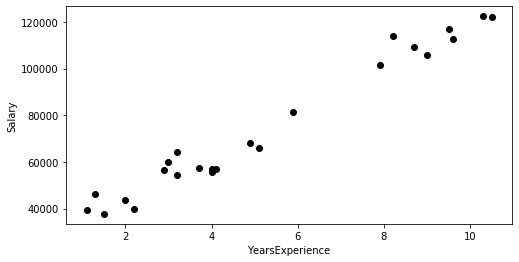

In [92]:
plt.figure(figsize=(8,4))
plt.scatter(
    X_train,
    y_train,
    c='black'
)
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.show()

In [69]:
X_train

,YearsExperience
26,9.5
3,2.0
24,8.7
22,7.9
23,8.2
4,2.2
2,1.5
25,9.0
6,3.0
18,5.9


In [70]:
X_test

,YearsExperience
17,5.3
21,7.1
10,3.9
19,6.0
14,4.5
20,6.8


In [0]:
predictions = reg.predict(X_test)

In [72]:
predictions

array([75074.50510972, 91873.8056381 , 62008.38247653, 81607.56642631,
       67608.14931932, 89073.92221671])

In [0]:
predictions = reg.predict(X)

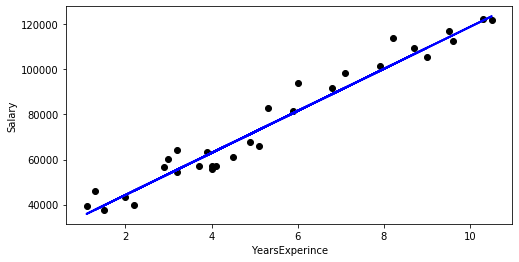

In [100]:
plt.figure(figsize=(8,4))
plt.scatter(
    df['YearsExperience'],
    df['Salary'],
    c='black'
)
plt.plot(
    X_train,
    reg.predict(X_train),
    c='blue',
    linewidth=2
)
plt.xlabel("YearsExperince")
plt.ylabel("Salary")
plt.show()

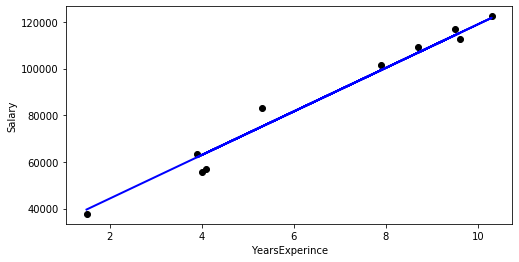

In [103]:
plt.figure(figsize=(8,4))
plt.scatter(
    X_test,
    y_test,
    c='black'
)
plt.plot(
    X_test,
    reg.predict(X_test),
    c='blue',
    linewidth=2
)
plt.xlabel("YearsExperince")
plt.ylabel("Salary")
plt.show()

In [53]:
print('Variance score: {}'.format(reg.score(X_test, y_test)))

Variance score: 0.7616681465472094


In [77]:
reg.score(X,y)

0.9559200375146584

In [78]:
reg.score(X_test,y_test)

0.7616681465472094

In [80]:
reg.score(X_train,y_train)

0.9677558036981184

**Slope**

In [81]:
reg.coef_

array([9332.94473799])

In [82]:
reg.intercept_

25609.89799835482

**Predict Single Value**

In [86]:
reg.predict(np.array([[14.5]]))

array([160937.59669925])

In [90]:
reg.predict(np.array([[2.5],[14.5]]))

array([ 48942.25984334, 160937.59669925])